In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import seaborn as sns
import statsmodels.api as sm
import chardet
import io
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.preprocessing import power_transform
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.cluster import DBSCAN
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import DBSCAN 
from sklearn.metrics import pairwise_distances 
from sklearn.neighbors import NearestNeighbors 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics  

In [2]:
pd.set_option('display.max_columns', 21)
pd.set_option('display.width', 100000)
pd.set_option('max_colwidth', 10000)
pd.option_context('display.colheader_justify','left')
pd.set_option('display.precision',3)

#### Reinserire percorso dataset!!!

In [3]:
df = pd.read_csv(r'/Users/mario/Documents/UNIPI/DataMining1/Project/Train_HR_Employee_Attrition.csv')
#df = pd.read_csv(r'file:/Users/AlessandroVavala/Desktop/Alessandro/Università/UniPi/Data Mining/DatasetProject1/Train_HR_Employee_Attrition.csv')

## Preparativi

In [4]:
#MonthlyIncome
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df.groupby('JobRole')['MonthlyIncome'].transform('mean'))
#Age
df['Age'] = df['Age'].fillna(df.groupby('JobRole')['Age'].transform('mean'))
#Over18
df["Over18"].fillna("Y", inplace = True) 
#Gender
df["Gender"].fillna("Male", inplace = True)
#BusinessTravel
df["BusinessTravel"].fillna("Travel_Rarely", inplace = True)
#StandardHours
df["StandardHours"].fillna(float("80.0"), inplace = True)
#PerformanceRating
df['PerformanceRating'] = df.groupby(['JobRole'], sort=False)['PerformanceRating'].apply(lambda x: x.fillna(x.mode().iloc[0])) 
#TRAININGLASTYEAR
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].fillna(df.groupby('JobRole')['TrainingTimesLastYear'].transform('mean'))
#YEARS AT COMPANY
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df.groupby('JobRole')['YearsAtCompany'].transform('mean'))
df.round({"Age" : 0 , "MonthlyIncome": 2 , "TrainingTimesLastYear" : 0 , "YearsAtCompany" : 0  })

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,37.0,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,Male,...,3,80.0,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,2,80.0,0,12,1.0,3,3.0,7,0,7
4,37.0,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,80.0,0,2,3.0,3,10.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,37.0,No,Travel_Rarely,1123,Research & Development,16,2,Medical,4,Female,...,2,80.0,2,1,3.0,2,17.0,0,0,0
1172,33.0,Yes,Non-Travel,249,Sales,6,4,Life Sciences,2,Female,...,2,80.0,0,12,2.0,2,11.0,7,7,7
1173,33.0,No,Travel_Rarely,583,Sales,4,1,Marketing,3,Male,...,1,80.0,0,5,2.0,4,3.0,2,0,3
1174,45.0,No,Non-Travel,1174,Sales,3,4,Marketing,1,Male,...,4,80.0,0,15,2.0,3,10.0,4,0,1


In [5]:
#OUTLIERS FOR MonthlyIncome
"""SD MonthlyIncome"""
MonthlyIncome_std = df ['MonthlyIncome'].std()
MonthlyIncome_std
"""MEAN MonthlyIncome"""
MonthlyIncome_mean = df ['MonthlyIncome'].mean()
MonthlyIncome_mean
threshold = 3
outlier = [] 
for i in df ['MonthlyIncome']: 
    z = (i-MonthlyIncome_mean)/MonthlyIncome_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.MonthlyIncome.isin(outlier)]

#OUTLIERS FOR TotalWorkingYears
"""SD TotalWorkingYears"""
TotalWorkingYears_std = df ['TotalWorkingYears'].std()
"""MEAN TotalWorkingYears"""
TotalWorkingYears_mean = df ['TotalWorkingYears'].mean()
threshold = 3
outlier = [] 
for i in df ['TotalWorkingYears']: 
    z = (i-TotalWorkingYears_mean)/TotalWorkingYears_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.TotalWorkingYears.isin(outlier)]

#OUTLIERS FOR YearsAtCompany
"""SD YearsAtCompany"""
YearsAtCompany_std = df ['YearsAtCompany'].std()
"""MEAN YearsAtCompany"""
YearsAtCompany_mean = df ['YearsAtCompany'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsAtCompany']: 
    z = (i-YearsAtCompany_mean)/YearsAtCompany_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsAtCompany.isin(outlier)]

#OUTLIERS FOR YearsInCurrentRole
"""SD YearsInCurrentRole"""
YearsInCurrentRole_std = df ['YearsInCurrentRole'].std()
"""MEAN YearsInCurrentRole"""
YearsInCurrentRole_mean = df ['YearsInCurrentRole'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsInCurrentRole']: 
    z = (i-YearsInCurrentRole_mean)/YearsInCurrentRole_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsInCurrentRole.isin(outlier)]
 
#OUTLIERS FOR YearsSinceLastPromotion
"""SD YearsSinceLastPromotion"""
YearsSinceLastPromotion_std = df ['YearsSinceLastPromotion'].std()
"""MEAN YearsSinceLastPromotion"""
YearsSinceLastPromotion_mean = df ['YearsSinceLastPromotion'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsSinceLastPromotion']: 
    z = (i-YearsSinceLastPromotion_mean)/YearsSinceLastPromotion_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsSinceLastPromotion.isin(outlier)]
 
#OUTLIERS FOR YearsWithCurrManager
"""SD YearsWithCurrManager"""
YearsWithCurrManager_std = df ['YearsWithCurrManager'].std()
"""MEAN YearsWithCurrManager"""
YearsWithCurrManager_mean = df ['YearsWithCurrManager'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsWithCurrManager']: 
    z = (i-YearsWithCurrManager_mean)/YearsWithCurrManager_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsWithCurrManager.isin(outlier)]

In [6]:
print('Numero outlier rimossi: ', 1176 - len(df))
len(df)

Numero outlier rimossi:  97


1079

In [7]:
df = df.drop(columns = 'StandardHours')
df = df.drop(columns = 'HourlyRate')
df = df.drop(columns = 'DailyRate')
df = df.drop(columns = 'MonthlyRate')
df = df.drop(columns = 'YearsInCurrentRole')
df = df.drop(columns = 'JobLevel')

# Pattern Mining

In [8]:
#conda install -c conda-forge pyfim

In [9]:
from fim import apriori
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [10]:
df = df.drop(columns = 'DistanceFromHome')
df = df.drop(columns = 'Education')
df = df.drop(columns = 'EnvironmentSatisfaction')
df = df.drop(columns = 'JobInvolvement')
df = df.drop(columns = 'JobSatisfaction')
df = df.drop(columns = 'NumCompaniesWorked')
df = df.drop(columns = 'PercentSalaryHike')
df = df.drop(columns = 'RelationshipSatisfaction')
df = df.drop(columns = 'StockOptionLevel')
df = df.drop(columns = 'TrainingTimesLastYear')
df = df.drop(columns = 'WorkLifeBalance')
df = df.drop(columns = 'YearsAtCompany')
df = df.drop(columns = 'PerformanceRating')
df = df.drop(columns = 'YearsSinceLastPromotion')
df = df.drop(columns = 'Over18')

#Department genera tautologie nel Association Rules
df = df.drop(columns = 'Department')

In [11]:
#Attrition categorico mappato
df['Attrition'] = df['Attrition'].map(
    {'No': 'No Attrition', 'Yes': 'Attrition'})

#OverTime Mappato
df['OverTime'] = df['OverTime'].map(
    {'No': 'No OverTime', 'Yes': 'Yes OverTime'})

#Age diviso in 3 bin
df['Age'] = pd.cut(df['Age'],bins = 3, right = False, labels=["Younger", "Middle Age", "Older"])

#MonthlyIncome diviso in 3 bin
df['MonthlyIncome'] = pd.cut(df['MonthlyIncome'],bins = 3, right = False, labels=['Low Income','Average Income','High Income'])

#TotalWorkingYears diviso in 3 bin
df['TotalWorkingYears'] = pd.cut(df['TotalWorkingYears'],bins = 3, right = False, labels=["Few Working Years", "Average Working Years", "Many Working Years"])

#YearsWithCurrManager diviso in 3 bin
df['YearsWithCurrManager'] = pd.cut(df['YearsWithCurrManager'],bins = 3, right = False, labels=["Few Years w Curr Manager", "Average Years w Curr Manager", "Many Years w Curr Manager"])


df.head(10)

,Age,Attrition,BusinessTravel,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,YearsWithCurrManager
0,Older,No Attrition,Travel_Rarely,Medical,Male,Research Director,Single,Average Income,No OverTime,Average Working Years,Many Years w Curr Manager
1,Middle Age,No Attrition,Travel_Rarely,Life Sciences,Male,Manager,Divorced,Low Income,Yes OverTime,Average Working Years,Average Years w Curr Manager
2,Middle Age,No Attrition,Travel_Frequently,Life Sciences,Male,Sales Executive,Divorced,Low Income,Yes OverTime,Few Working Years,Few Years w Curr Manager
3,Middle Age,No Attrition,Travel_Rarely,Technical Degree,Male,Research Scientist,Single,Low Income,No OverTime,Average Working Years,Average Years w Curr Manager
4,Middle Age,No Attrition,Travel_Rarely,Life Sciences,Female,Laboratory Technician,Single,Average Income,No OverTime,Few Working Years,Few Years w Curr Manager
5,Middle Age,No Attrition,Travel_Rarely,Life Sciences,Male,Research Scientist,Divorced,Low Income,No OverTime,Few Working Years,Few Years w Curr Manager
6,Younger,No Attrition,Travel_Rarely,Life Sciences,Male,Sales Representative,Married,Average Income,No OverTime,Few Working Years,Few Years w Curr Manager
7,Middle Age,No Attrition,Travel_Rarely,Life Sciences,Female,Sales Executive,Divorced,Low Income,No OverTime,Average Working Years,Average Years w Curr Manager
8,Middle Age,No Attrition,Travel_Rarely,Life Sciences,Male,Sales Executive,Married,Low Income,No OverTime,Average Working Years,Many Years w Curr Manager
9,Younger,No Attrition,Travel_Frequently,Medical,Male,Sales Executive,Divorced,Low Income,Yes OverTime,Few Working Years,Few Years w Curr Manager


In [12]:
#### Intervalli

#Age [18,32) [32,46) [46,60)
#MonthlyIncome [1009.0, 7115.333) [7115.333, 13221.667) [7115.333, 13221.667)
#TotalWorkingYears [0.0, 11.333) [11.333, 22.667) [22.667, 34.034)
#YearsWithCurrManager [0.0, 4.667) [4.667, 9.333) [9.333, 14.014)

### Frequent patterns extraction with different values of support and different types (i.e. frequent, close, maximal)

In [13]:
baskets = df.values.tolist()
baskets

[['Older',
  'No Attrition',
  'Travel_Rarely',
  'Medical',
  'Male',
  'Research Director',
  'Single',
  'Average Income',
  'No OverTime',
  'Average Working Years',
  'Many Years w Curr Manager'],
 ['Middle Age',
  'No Attrition',
  'Travel_Rarely',
  'Life Sciences',
  'Male',
  'Manager',
  'Divorced',
  'Low Income',
  'Yes OverTime',
  'Average Working Years',
  'Average Years w Curr Manager'],
 ['Middle Age',
  'No Attrition',
  'Travel_Frequently',
  'Life Sciences',
  'Male',
  'Sales Executive',
  'Divorced',
  'Low Income',
  'Yes OverTime',
  'Few Working Years',
  'Few Years w Curr Manager'],
 ['Middle Age',
  'No Attrition',
  'Travel_Rarely',
  'Technical Degree',
  'Male',
  'Research Scientist',
  'Single',
  'Low Income',
  'No OverTime',
  'Average Working Years',
  'Average Years w Curr Manager'],
 ['Middle Age',
  'No Attrition',
  'Travel_Rarely',
  'Life Sciences',
  'Female',
  'Laboratory Technician',
  'Single',
  'Average Income',
  'No OverTime',
  'Few W

In [14]:
def calculate_apriori(baskets,minsup,zmin,target):
    itemsets = apriori(baskets, supp=minsup, zmin=zmin, target=target) 
    return [minsup,len(itemsets),zmin,target]

l=[]
l.append(calculate_apriori(baskets,minsup=10,zmin=4,target= 'a'))
l.append(calculate_apriori(baskets,minsup=15,zmin=4,target= 'a'))
l.append(calculate_apriori(baskets,minsup=20,zmin=4,target= 'a'))
l.append(calculate_apriori(baskets,minsup=30,zmin=4,target= 'a'))
l.append(calculate_apriori(baskets,minsup=10,zmin=4,target= 'c'))
l.append(calculate_apriori(baskets,minsup=15,zmin=4,target= 'c'))
l.append(calculate_apriori(baskets,minsup=20,zmin=4,target= 'c'))
l.append(calculate_apriori(baskets,minsup=30,zmin=4,target= 'c'))
l.append(calculate_apriori(baskets,minsup=10,zmin=4,target= 'm'))
l.append(calculate_apriori(baskets,minsup=15,zmin=4,target= 'm'))
l.append(calculate_apriori(baskets,minsup=20,zmin=4,target= 'm'))
l.append(calculate_apriori(baskets,minsup=30,zmin=4,target= 'm'))



dts = pd.DataFrame(l,columns = ['Min Support','N° of item in itemsets','Minimum element in a item','Type of pattern extraction'])
dts['Type of pattern extraction'] = dts['Type of pattern extraction'].map({'a': 'Frequent','c': 'Close','m':'Maximal'})
dts.set_index('Min Support')

,N° of item in itemsets,Minimum element in a item,Type of pattern extraction
Min Support,,,
10,631,4,Frequent
15,200,4,Frequent
20,82,4,Frequent
30,11,4,Frequent
10,631,4,Close
15,200,4,Close
20,82,4,Close
30,11,4,Close
10,250,4,Maximal


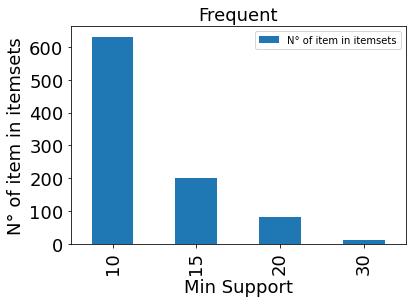

In [15]:
dts.loc[dts['Type of pattern extraction']=='Frequent'].set_index('Min Support')[['N° of item in itemsets']].plot(kind='bar', title ="V comp", fontsize=18)
plt.title('Frequent', fontsize = 18)
plt.ylabel('N° of item in itemsets', fontsize = 18)
plt.xlabel('Min Support', fontsize = 18)
plt.show()

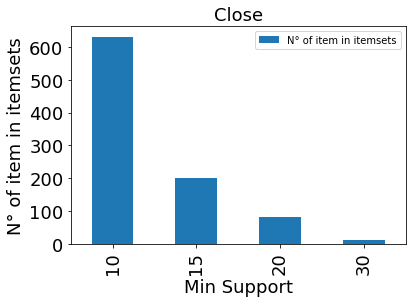

In [16]:
dts.loc[dts['Type of pattern extraction']=='Close'].set_index('Min Support')[['N° of item in itemsets']].plot(kind='bar', title ="V comp", fontsize=18)
plt.title('Close', fontsize = 18)
plt.ylabel('N° of item in itemsets', fontsize = 18)
plt.xlabel('Min Support', fontsize = 18)
plt.show()

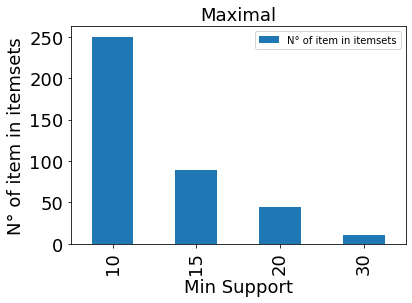

In [17]:
dts.loc[dts['Type of pattern extraction']=='Maximal'].set_index('Min Support')[['N° of item in itemsets']].plot(kind='bar', title ="V comp", fontsize=18)
plt.title('Maximal', fontsize = 18)
plt.ylabel('N° of item in itemsets', fontsize = 18)
plt.xlabel('Min Support', fontsize = 18)
plt.show()

### Discussion of the most interesting frequent patterns and analyze how changes the number of patterns w.r.t. the min_sup parameter 

In [18]:
itemsets = apriori(baskets, supp=10, zmin=4, target='a') 
itemsets[:10]

[(('Laboratory Technician',
   'Few Years w Curr Manager',
   'Few Working Years',
   'Low Income'),
  115),
 (('Laboratory Technician', 'Few Working Years', 'No OverTime', 'Low Income'),
  114),
 (('Laboratory Technician',
   'Few Working Years',
   'No OverTime',
   'No Attrition'),
  111),
 (('Research Scientist',
   'Few Years w Curr Manager',
   'Few Working Years',
   'Travel_Rarely'),
  118),
 (('Research Scientist',
   'Few Years w Curr Manager',
   'Few Working Years',
   'Low Income'),
  120),
 (('Research Scientist',
   'Few Years w Curr Manager',
   'Few Working Years',
   'No Attrition'),
  126),
 (('Research Scientist',
   'Few Years w Curr Manager',
   'Travel_Rarely',
   'No Attrition'),
  113),
 (('Research Scientist',
   'Few Years w Curr Manager',
   'Low Income',
   'No Attrition'),
  111),
 (('Research Scientist', 'Few Working Years', 'No OverTime', 'No Attrition'),
  114),
 (('Research Scientist', 'Few Working Years', 'Travel_Rarely', 'Low Income'),
  111)]

In [19]:
ditemset  = pd.DataFrame(itemsets,columns = ['Values in an item','Support'])
ditemset.sort_values(by='Support', ascending=False).head()

,Values in an item,Support
630,"(No OverTime, Travel_Rarely, Low Income, No Attrition)",392
628,"(Few Working Years, No OverTime, Low Income, No Attrition)",380
619,"(Few Years w Curr Manager, Few Working Years, Low Income, No Attrition)",358
629,"(Few Working Years, Travel_Rarely, Low Income, No Attrition)",351
615,"(Few Years w Curr Manager, Few Working Years, No OverTime, No Attrition)",349


### Association rules extraction with different values of confidence

In [20]:
rules = apriori(baskets, supp=10, zmin=1, target='r', conf=60, report='acl') 
print(len(rules))

5197


In [21]:
totdf = pd.DataFrame(rules, columns=['Target','Pattern','Support','Confidence','Lift'])
totdf.sort_values(by='Confidence', ascending=False).head(10)

,Target,Pattern,Support,Confidence,Lift
166,Few Working Years,"(Laboratory Technician, Few Years w Curr Manager, No OverTime)",106,0.955,1.372
886,No Attrition,"(Average Working Years, Middle Age, No OverTime)",113,0.950,1.149
1400,No Attrition,"(Average Years w Curr Manager, No OverTime, Travel_Rarely, Low Income)",125,0.947,1.145
4227,No Attrition,"(Married, Few Working Years, No OverTime, Low Income)",190,0.941,1.138
1081,Low Income,"(Younger, Male, No OverTime, No Attrition)",110,0.940,1.211
1105,Low Income,"(Younger, Male, No Attrition)",141,0.940,1.210
2472,No Attrition,"(Female, Life Sciences, No OverTime)",109,0.940,1.137
4119,No Attrition,"(Married, Few Years w Curr Manager, Few Working Years, No OverTime, Low Income)",140,0.940,1.137
177,Few Working Years,"(Laboratory Technician, Few Years w Curr Manager)",138,0.939,1.349
1058,Low Income,"(Younger, Male, Few Working Years, No Attrition)",107,0.939,1.209


In [22]:
l=[]
conf = 60
rules = apriori(baskets, supp=10, zmin=4, target='r', conf=conf, report='acl') 
l.append([conf,len(rules)])

conf = 70
rules = apriori(baskets, supp=10, zmin=4, target='r', conf=conf, report='acl') 
l.append([conf,len(rules)])

conf = 80
rules = apriori(baskets, supp=10, zmin=4, target='r', conf=conf, report='acl') 
l.append([conf,len(rules)])

conf = 90
rules = apriori(baskets, supp=10, zmin=4, target='r', conf=conf, report='acl') 
l.append([conf,len(rules)])


dts = pd.DataFrame(l,columns = ['Confidence','N° of generated rules'])
dts.set_index('Confidence')

,N° of generated rules
Confidence,
60,4132
70,2721
80,883
90,120


### Discussion of the most interesting rules and analyze how changes the number of rules w.r.t. the min_conf parameter, histogram of rules' confidence and lift

In [23]:
rules = apriori(baskets, supp=10, zmin=4, target='r', conf=39, report='acl') 
rules

[('Marketing',
  ('Sales Executive', 'Middle Age', 'No OverTime'),
  48,
  0.4247787610619469,
  3.951174855050351),
 ('Marketing',
  ('Sales Executive', 'Middle Age', 'Travel_Rarely'),
  45,
  0.391304347826087,
  3.6398050974512746),
 ('Marketing',
  ('Sales Executive', 'Middle Age', 'Low Income', 'No Attrition'),
  44,
  0.4074074074074074,
  3.7895913154533845),
 ('Marketing',
  ('Sales Executive', 'Middle Age', 'Low Income'),
  51,
  0.3984375,
  3.7061557112068964),
 ('Marketing',
  ('Sales Executive', 'Middle Age', 'No Attrition'),
  50,
  0.390625,
  3.6334859913793105),
 ('Marketing',
  ('Sales Executive', 'Few Years w Curr Manager', 'Low Income'),
  47,
  0.41228070175438597,
  3.8349213551119177),
 ('Marketing',
  ('Sales Executive', 'Travel_Rarely', 'Low Income', 'No Attrition'),
  50,
  0.4,
  3.720689655172414),
 ('Female',
  ('Travel_Frequently', 'No OverTime', 'No Attrition'),
  51,
  0.4358974358974359,
  1.1198412698412699),
 ('Female',
  ('Travel_Frequently', 'Low In

In [24]:
rules_attrition = []
for r in rules:
    if r[0] == 'Attrition':
        rules_attrition.append(r)
        
rules_noattrition = []
for r in rules:
    if r[0] == 'No Attrition':
        rules_noattrition.append(r) 
        

df_att = pd.DataFrame(rules_attrition,columns = ['Target','Pattern','Support','Confidence','Lift'])
df_noatt = pd.DataFrame(rules_noattrition,columns = ['Target','Pattern','Support','Confidence','Lift'])
print(len(df_att))
print(len(df_noatt))

7
537


In [25]:
df_att.sort_values(by='Confidence', ascending=False).head(10)

,Target,Pattern,Support,Confidence,Lift
0,Attrition,"(Yes OverTime, Few Years w Curr Manager, Few Working Years, Travel_Rarely)",56,0.452,2.606
2,Attrition,"(Yes OverTime, Few Years w Curr Manager, Few Working Years)",72,0.450,2.597
1,Attrition,"(Yes OverTime, Few Years w Curr Manager, Few Working Years, Low Income)",53,0.414,2.389
6,Attrition,"(Single, Few Years w Curr Manager, Few Working Years, Travel_Rarely, Low Income)",45,0.398,2.298
5,Attrition,"(Single, Middle Age, Few Working Years, Travel_Rarely)",43,0.398,2.297
4,Attrition,"(Yes OverTime, Few Working Years, Travel_Rarely)",64,0.398,2.294
3,Attrition,"(Yes OverTime, Few Years w Curr Manager, Travel_Rarely)",63,0.391,2.258


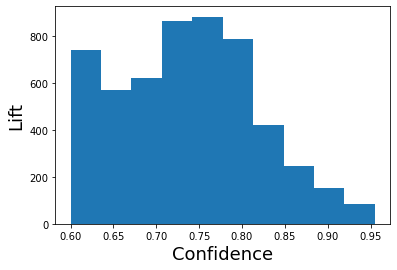

In [26]:
hist(totdf.Confidence, weights=totdf.Lift)
#plt.title('Confidence and Lift Histogram', fontsize = 18)
plt.ylabel('Lift', fontsize = 18)
plt.xlabel('Confidence', fontsize = 18)
plt.show()

### Use the most meaningful rules to replace missing values and evaluate the accuracy

In [27]:
rules_male = []
for r in rules:
    if r[0] == 'Male':
        rules_male.append(r)
        
rules_female = []
for r in rules:
    if r[0] == 'Female':
        rules_female.append(r) 
        

df_male = pd.DataFrame(rules_male,columns = ['Target','Pattern','Support','Confidence','Lift'])
df_female = pd.DataFrame(rules_female,columns = ['Target','Pattern','Support','Confidence','Lift'])
print(len(df_male))
print(len(df_female))

626
277


In [28]:
df_male.sort_values(by='Confidence', ascending=False).head(1)

,Target,Pattern,Support,Confidence,Lift
145,Male,"(Younger, No OverTime, Travel_Rarely, Low Income, No Attrition)",82,0.732,1.199


In [29]:
df_female.sort_values(by='Confidence', ascending=False).head(1)

,Target,Pattern,Support,Confidence,Lift
67,Female,"(Average Years w Curr Manager, Married, Low Income)",57,0.504,1.296


In [30]:
dm = pd.DataFrame(df.loc[(df['Age'] == 'Younger') & (df['OverTime'] == 'No OverTime') & (df['BusinessTravel'] == 'Travel_Rarely') & (df['MonthlyIncome'] == 'Low Income') & (df['Attrition'] == 'No Attrition')].values,columns = df.columns)
df = pd.DataFrame(df.loc[(df['YearsWithCurrManager'] == 'Average Years w Curr Manager') & (df['MaritalStatus'] == 'Married') & (df['MonthlyIncome'] == 'Low Income')].values,columns = df.columns)

print('Male:')
print('TP: ' + str(len(dm.loc[dm['Gender'] == 'Male'])))
print('FP: ' + str(len(dm.loc[dm['Gender'] == 'Female'])))
print('TN: ' + str(len(df.loc[df['Gender'] == 'Female'])))
print('FN: ' + str(len(df.loc[df['Gender'] == 'Male'])))
print('')
print('Female:')
print('TP: ' + str(len(df.loc[df['Gender'] == 'Female'])))
print('FP: ' + str(len(df.loc[df['Gender'] == 'Male'])))
print('TN: ' + str(len(dm.loc[dm['Gender'] == 'Male'])))
print('FN: ' + str(len(dm.loc[dm['Gender'] == 'Female'])))
print('')

sumtrue = ((len(dm.loc[dm['Gender'] == 'Male']))+(len(df.loc[df['Gender'] == 'Female']))+(len(df.loc[df['Gender'] == 'Female']))+(len(dm.loc[dm['Gender'] == 'Male'])))
sumfalse = ((len(dm.loc[dm['Gender'] == 'Female']))+(len(df.loc[df['Gender'] == 'Male']))+(len(df.loc[df['Gender'] == 'Male']))+(len(dm.loc[dm['Gender'] == 'Female'])))                                                                      
accuracy = sumtrue/(sumtrue+sumfalse)

print('Accuracy: ' + str(accuracy))

Male:
TP: 82
FP: 30
TN: 57
FN: 56

Female:
TP: 57
FP: 56
TN: 82
FN: 30

Accuracy: 0.6177777777777778


### Use the most meaningful rules to predict the target variable and evaluate the accuracy

In [31]:
df = pd.read_csv(r'/Users/mario/Documents/UNIPI/DataMining1/Project/Train_HR_Employee_Attrition.csv')
#df = pd.read_csv(r'file:/Users/AlessandroVavala/Desktop/Alessandro/Università/UniPi/Data Mining/DatasetProject1/Train_HR_Employee_Attrition.csv')

#MonthlyIncome
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df.groupby('JobRole')['MonthlyIncome'].transform('mean'))
#Age
df['Age'] = df['Age'].fillna(df.groupby('JobRole')['Age'].transform('mean'))
#Over18
df["Over18"].fillna("Y", inplace = True) 
#Gender
df["Gender"].fillna("Male", inplace = True)
#BusinessTravel
df["BusinessTravel"].fillna("Travel_Rarely", inplace = True)
#StandardHours
df["StandardHours"].fillna(float("80.0"), inplace = True)
#PerformanceRating
df['PerformanceRating'] = df.groupby(['JobRole'], sort=False)['PerformanceRating'].apply(lambda x: x.fillna(x.mode().iloc[0])) 
#TRAININGLASTYEAR
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].fillna(df.groupby('JobRole')['TrainingTimesLastYear'].transform('mean'))
#YEARS AT COMPANY
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df.groupby('JobRole')['YearsAtCompany'].transform('mean'))
df.round({"Age" : 0 , "MonthlyIncome": 2 , "TrainingTimesLastYear" : 0 , "YearsAtCompany" : 0  })

#OUTLIERS FOR MonthlyIncome
"""SD MonthlyIncome"""
MonthlyIncome_std = df ['MonthlyIncome'].std()
MonthlyIncome_std
"""MEAN MonthlyIncome"""
MonthlyIncome_mean = df ['MonthlyIncome'].mean()
MonthlyIncome_mean
threshold = 3
outlier = [] 
for i in df ['MonthlyIncome']: 
    z = (i-MonthlyIncome_mean)/MonthlyIncome_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.MonthlyIncome.isin(outlier)]

#OUTLIERS FOR TotalWorkingYears
"""SD TotalWorkingYears"""
TotalWorkingYears_std = df ['TotalWorkingYears'].std()
"""MEAN TotalWorkingYears"""
TotalWorkingYears_mean = df ['TotalWorkingYears'].mean()
threshold = 3
outlier = [] 
for i in df ['TotalWorkingYears']: 
    z = (i-TotalWorkingYears_mean)/TotalWorkingYears_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.TotalWorkingYears.isin(outlier)]

#OUTLIERS FOR YearsAtCompany
"""SD YearsAtCompany"""
YearsAtCompany_std = df ['YearsAtCompany'].std()
"""MEAN YearsAtCompany"""
YearsAtCompany_mean = df ['YearsAtCompany'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsAtCompany']: 
    z = (i-YearsAtCompany_mean)/YearsAtCompany_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsAtCompany.isin(outlier)]

#OUTLIERS FOR YearsInCurrentRole
"""SD YearsInCurrentRole"""
YearsInCurrentRole_std = df ['YearsInCurrentRole'].std()
"""MEAN YearsInCurrentRole"""
YearsInCurrentRole_mean = df ['YearsInCurrentRole'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsInCurrentRole']: 
    z = (i-YearsInCurrentRole_mean)/YearsInCurrentRole_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsInCurrentRole.isin(outlier)]
 
#OUTLIERS FOR YearsSinceLastPromotion
"""SD YearsSinceLastPromotion"""
YearsSinceLastPromotion_std = df ['YearsSinceLastPromotion'].std()
"""MEAN YearsSinceLastPromotion"""
YearsSinceLastPromotion_mean = df ['YearsSinceLastPromotion'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsSinceLastPromotion']: 
    z = (i-YearsSinceLastPromotion_mean)/YearsSinceLastPromotion_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsSinceLastPromotion.isin(outlier)]
 
#OUTLIERS FOR YearsWithCurrManager
"""SD YearsWithCurrManager"""
YearsWithCurrManager_std = df ['YearsWithCurrManager'].std()
"""MEAN YearsWithCurrManager"""
YearsWithCurrManager_mean = df ['YearsWithCurrManager'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsWithCurrManager']: 
    z = (i-YearsWithCurrManager_mean)/YearsWithCurrManager_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsWithCurrManager.isin(outlier)]
        
df = df.drop(columns = 'StandardHours')
df = df.drop(columns = 'HourlyRate')
df = df.drop(columns = 'DailyRate')
df = df.drop(columns = 'MonthlyRate')
df = df.drop(columns = 'YearsInCurrentRole')
df = df.drop(columns = 'JobLevel')
df = df.drop(columns = 'DistanceFromHome')
df = df.drop(columns = 'Education')
df = df.drop(columns = 'EnvironmentSatisfaction')
df = df.drop(columns = 'JobInvolvement')
df = df.drop(columns = 'JobSatisfaction')
df = df.drop(columns = 'NumCompaniesWorked')
df = df.drop(columns = 'PercentSalaryHike')
df = df.drop(columns = 'RelationshipSatisfaction')
df = df.drop(columns = 'StockOptionLevel')
df = df.drop(columns = 'TrainingTimesLastYear')
df = df.drop(columns = 'WorkLifeBalance')
df = df.drop(columns = 'YearsAtCompany')
df = df.drop(columns = 'PerformanceRating')
df = df.drop(columns = 'YearsSinceLastPromotion')
df = df.drop(columns = 'Over18')
df = df.drop(columns = 'Department')


#Attrition categorico mappato
df['Attrition'] = df['Attrition'].map(
    {'No': 'No Attrition', 'Yes': 'Attrition'})

#OverTime Mappato
df['OverTime'] = df['OverTime'].map(
    {'No': 'No OverTime', 'Yes': 'Yes OverTime'})

#Age diviso in 3 bin
df['Age'] = pd.cut(df['Age'],bins = 3, right = False, labels=["Younger", "Middle Age", "Older"])

#MonthlyIncome diviso in 3 bin
df['MonthlyIncome'] = pd.cut(df['MonthlyIncome'],bins = 3, right = False, labels=['Low Income','Average Income','High Income'])

#TotalWorkingYears diviso in 3 bin
df['TotalWorkingYears'] = pd.cut(df['TotalWorkingYears'],bins = 3, right = False, labels=["Few Working Years", "Average Working Years", "Many Working Years"])

#YearsWithCurrManager diviso in 3 bin
df['YearsWithCurrManager'] = pd.cut(df['YearsWithCurrManager'],bins = 3, right = False, labels=["Few Years w Curr Manager", "Average Years w Curr Manager", "Many Years w Curr Manager"])

In [32]:
df_noatt.sort_values(by='Confidence', ascending=False).head(1)

,Target,Pattern,Support,Confidence,Lift
55,No Attrition,"(Average Working Years, Middle Age, No OverTime)",113,0.95,1.149


In [33]:
df_att.sort_values(by='Confidence', ascending=False).head(1)

,Target,Pattern,Support,Confidence,Lift
0,Attrition,"(Yes OverTime, Few Years w Curr Manager, Few Working Years, Travel_Rarely)",56,0.452,2.606


In [34]:
dn = pd.DataFrame(df.loc[(df['Age'] == 'Middle Age') & (df['TotalWorkingYears'] == 'Average Working Years') & (df['OverTime'] == 'No OverTime')].values,columns = df.columns)
dp = pd.DataFrame(df.loc[(df['OverTime'] == 'Yes OverTime') & (df['YearsWithCurrManager'] == 'Few Years w Curr Manager') & (df['TotalWorkingYears'] == 'Few Working Years') & (df['BusinessTravel'] == 'Travel_Rarely')].values,columns = df.columns)

print('TP: ' + str(len(dp.loc[dp['Attrition'] == 'Attrition'])))
print('FP: ' + str(len(dp.loc[dp['Attrition'] == 'No Attrition'])))
print('TN: ' + str(len(dn.loc[dn['Attrition'] == 'No Attrition'])))
print('FN: ' + str(len(dn.loc[dn['Attrition'] == 'Attrition'])))
print('')

sumtrue2 = (len(dp.loc[dp['Attrition'] == 'Attrition'])) + (len(dn.loc[dn['Attrition'] == 'No Attrition']))
sumfalse2 = (len(dp.loc[dp['Attrition'] == 'No Attrition'])) + (len(dn.loc[dn['Attrition'] == 'Attrition']))
accuracy2 = sumtrue2/(sumtrue2 + sumfalse2)
print('Accuracy: ' + str(accuracy2))

TP: 56
FP: 68
TN: 113
FN: 6

Accuracy: 0.6954732510288066
